In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import calibration
reload(calibration);
from calibration import *
import pandas as pd
from tqdm import trange
import os

In [2]:
feb = glob.glob("/users/dbautist/CHIME_landing_directory/learmonthData/*2402*SRD")
mar = glob.glob("/users/dbautist/CHIME_landing_directory/learmonthData/*2403*SRD")
apr = glob.glob("/users/dbautist/CHIME_landing_directory/learmonthData/*2404*SRD")
may = glob.glob("/users/dbautist/CHIME_landing_directory/learmonthData/*2405*SRD")

In [3]:
day_path = mar[0]
df = load_Learmonth_data(day_path)

# Data exploration

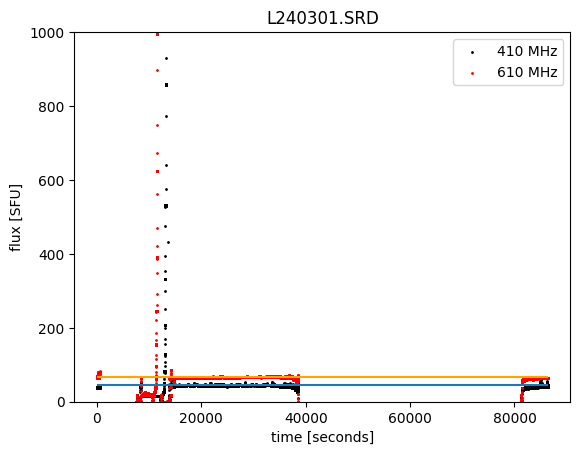

In [5]:
plt.figure()
plt.scatter(df["seconds"], df["410"], s=1, c='k', label="410 MHz")
plt.scatter(df["seconds"], df["610"], s=1, c='r', label="610 MHz")
plt.legend()
plt.xlabel("time [seconds]")
plt.ylabel("flux [SFU]")
plt.ylim(0,1000)
plt.hlines(np.nanmedian(df["410"]), 0, 3600*24, label="410 MHz median")
plt.hlines(np.nanmedian(df["610"]), 0, 3600*24, label="610 MHz median", color="orange")
plt.title(f"{os.path.basename(day_path)}")
plt.savefig("/users/dbautist/CHIME_landing_directory/confluence/LSO_example_plot.png", bbox_inches="tight", transparent=False)


In [6]:
def loop_bool(df):
    check_median = (not np.isnan(np.nanmedian(df["410"]))) and np.nanmedian(df["410"]) != 0 and np.nanmedian(df["410"]) != 1 and np.nanmedian(df["410"]) > 0
    result  = check_median
    return result

In [7]:
tolerance = 10
n_hours = 4
sec_per_hr = 3600

sufficient_data = []
insufficient_data = []

feb_410 = []
feb_610 = []
for i in trange(len(feb)):
    df = load_Learmonth_data(feb[i])
    sun_track = reduce_learmonth_data(df, tolerance=tolerance, key="410")
    if loop_bool(df):
        sufficient_data.append(feb[i])
    else:
        insufficient_data.append(feb[i])
    feb_410.append(np.nanmedian(df["410"]))
    feb_610.append(np.nanmedian(df["610"]))

mar_410 = []
mar_610 = []
for i in trange(len(mar)):
    df = load_Learmonth_data(mar[i])
    sun_track = reduce_learmonth_data(df, tolerance=tolerance, key="410")
    if loop_bool(df):
        sufficient_data.append(mar[i])
    else:
        insufficient_data.append(mar[i])
    mar_410.append(np.nanmedian(df["410"]))
    mar_610.append(np.nanmedian(df["610"]))

apr_410 = []
apr_610 = []
for i in trange(len(apr)):
    df = load_Learmonth_data(apr[i])
    sun_track = reduce_learmonth_data(df, tolerance=tolerance, key="410")
    if loop_bool(df):
        sufficient_data.append(apr[i])
    else:
        insufficient_data.append(apr[i])
    apr_410.append(np.nanmedian(df["410"]))
    apr_610.append(np.nanmedian(df["610"]))

may_410 = []
may_610 = []
for i in trange(len(may)):
    df = load_Learmonth_data(may[i])
    sun_track = reduce_learmonth_data(df, tolerance=tolerance, key="410")
    if loop_bool(df):
        sufficient_data.append(may[i])
    else:
        insufficient_data.append(may[i])
    may_410.append(np.nanmedian(df["410"]))
    may_610.append(np.nanmedian(df["610"]))

  0%|          | 0/25 [00:00<?, ?it/s]

/users/dbautist/CHIME_landing_directory/calibration.py:171: RuntimeWarning: All-NaN slice encountered
  mask = np.where(np.abs(df[key].values - np.nanmedian(df[key])) < tolerance)
/tmp/ipykernel_4586/959798313.py:2: RuntimeWarning: All-NaN slice encountered
  check_median = (not np.isnan(np.nanmedian(df["410"]))) and np.nanmedian(df["410"]) != 0 and np.nanmedian(df["410"]) != 1 and np.nanmedian(df["410"]) > 0
/tmp/ipykernel_4586/3336220573.py:17: RuntimeWarning: All-NaN slice encountered
  feb_410.append(np.nanmedian(df["410"]))
/tmp/ipykernel_4586/3336220573.py:18: RuntimeWarning: All-NaN slice encountered
  feb_610.append(np.nanmedian(df["610"]))
 81%|████████  | 25/31 [01:39<00:16,  2.72s/it]/tmp/ipykernel_4586/3336220573.py:29: RuntimeWarning: All-NaN slice encountered
  mar_410.append(np.nanmedian(df["410"]))
/tmp/ipykernel_4586/3336220573.py:30: RuntimeWarning: All-NaN slice encountered
  mar_610.append(np.nanmedian(df["610"]))
  0%|          | 0/30 [00:00<?, ?it/s]/tmp/ipykernel

Text(0, 0.5, 'Flux [SFU]')

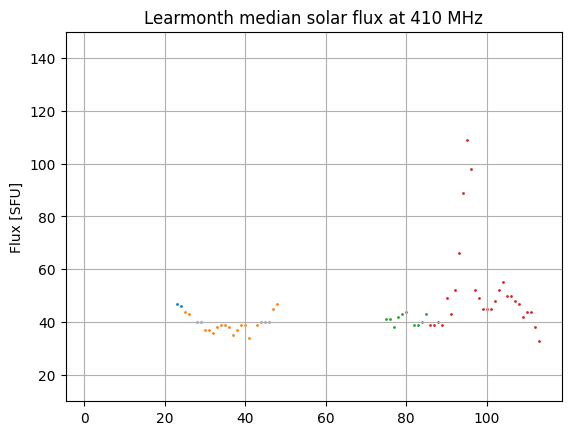

In [8]:
plt.figure()
plt.scatter(np.arange(len(feb_410)), feb_410, s=1)
plt.scatter(np.arange(len(mar_410)) + len(feb_410), mar_410, s=1)
plt.scatter(np.arange(len(apr_410)) + len(feb_410) + len(mar_410), apr_410, s=1)
plt.scatter(np.arange(len(may_410)) + len(feb_410) + len(mar_410) + len(apr_410), may_410, s=1)
plt.ylim(10, 150)
plt.grid()
plt.title("Learmonth median solar flux at 410 MHz")
plt.ylabel("Flux [SFU]")

Text(0, 0.5, 'Flux [SFU]')

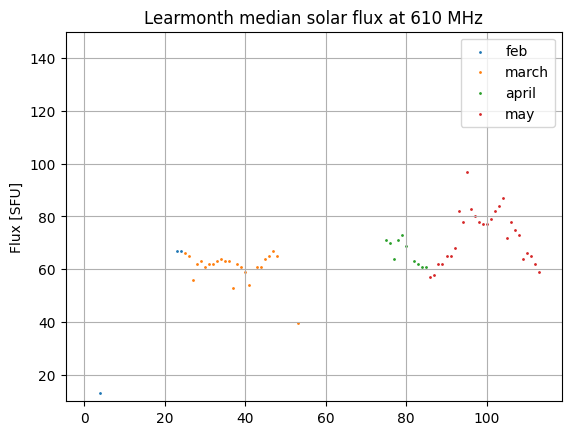

In [9]:
plt.figure()
plt.scatter(np.arange(len(feb_610)), feb_610, s=1, label="feb")
plt.scatter(np.arange(len(mar_610)) + len(feb_610), mar_610, s=1, label="march")
plt.scatter(np.arange(len(apr_610)) + len(feb_610) + len(mar_610), apr_610, s=1, label="april")
plt.scatter(np.arange(len(may_610)) + len(feb_610) + len(mar_610) + len(apr_610), may_610, s=1, label="may")
plt.ylim(10, 150)
plt.legend()
plt.grid()
plt.title("Learmonth median solar flux at 610 MHz")
plt.ylabel("Flux [SFU]")


# Checking data quality

In [10]:
len(sufficient_data), len(insufficient_data)

(62, 52)

In [11]:
os.path.basename(insufficient_data[27]).replace(".SRD", ".png")

'L240327.png'

# Plotting the good data

In [14]:
def get_day(path):
    filename = os.path.basename(path).replace(".SRD", "")
    YYMMDD = filename[1:]
    datetime_obj = datetime.strptime(YYMMDD, "%y%m%d")
    return int(datetime_obj.strftime("%j"))

get_day(sufficient_data[0])

59

In [15]:
days = []
flux_410 = []
flux_610 = []

for i in trange(len(sufficient_data)):
    path = sufficient_data[i]
    df = load_Learmonth_data(path)
    days.append(get_day(path))
    flux_410.append(np.nanmedian(df["410"]))
    flux_610.append(np.nanmedian(df["610"]))
    

100%|██████████| 62/62 [04:57<00:00,  4.80s/it]


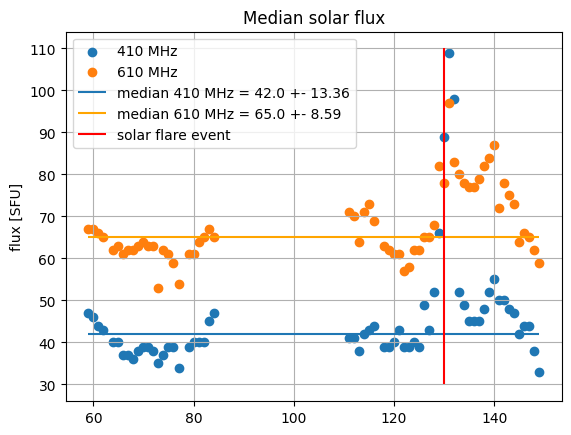

In [18]:
plt.figure()
plt.scatter(days, flux_410, label="410 MHz")
plt.scatter(days, flux_610, label="610 MHz")
plt.title("Median solar flux")
plt.ylabel("flux [SFU]")
plt.grid()
plt.hlines(np.median(flux_410), min(days), max(days), label=f"median 410 MHz = {np.median(flux_410)} +- %s"%np.round(np.std(flux_410), 2))
plt.hlines(np.median(flux_610), min(days), max(days), color='orange', label=f"median 610 MHz = {np.median(flux_610)} +- %s"%np.round(np.std(flux_610), 2))
plt.vlines(130, 30, 110, label="solar flare event", color="red")
plt.legend()
# plt.savefig("/users/dbautist/CHIME_landing_directory/confluence/solar_flux.png", transparent=False, bbox_inches="tight")

In [17]:
with open("/users/dbautist/CHIME_landing_directory/learmonthData/good_data.txt", "w") as f:
    for file in sufficient_data:
        f.write(f"{file}\n")